In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

"""
Pandas DataFrames

"""

'\nPandas DataFrames\n\n'

In [16]:
# Read iris dataset from UCI database
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [6]:
#Get info of the data

print(df.info())
print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None



In [8]:
#Get statistical summary of the data

print(df.describe())
print('')

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000



In [9]:
#Look at the first 0 rows of the data
print(df.head(10))
print('')

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa



In [20]:
#Select rows with sepal_lenght more than 5.0

df2 = df.loc[df['sepal_length'] > 5.0, ]

'''
Data Visualization in Pandas

'''

'\nData Visualization in Pandas\n\n'

In [21]:
#Define marker shapes by class

marker_shapes = ['.', '^', '*']

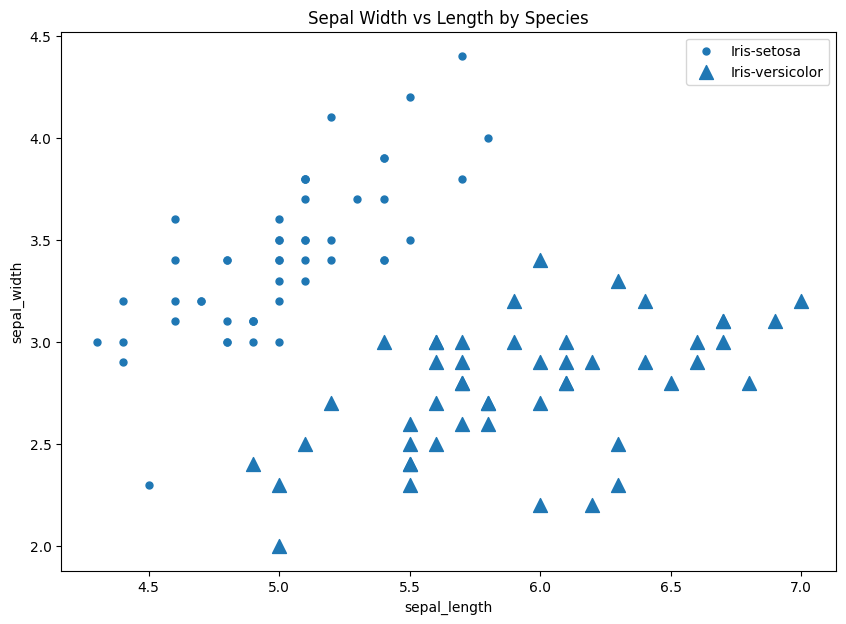

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
#Then plot the scatterplot

for i, species in enumerate(df['class'].unique()):
  if i == 0:
    ax = df[df['class'] == species].plot.scatter(x='sepal_length', y='sepal_width', marker=marker_shapes[i], s=100, title="Sepal Width vs length by Species", label=species, figsize=(10,7))
  else:
    df[df['class'] == species].plot.scatter(x='sepal_length', y='sepal_width', marker=marker_shapes[i], s=100, title="Sepal Width vs Length by Species", label=species, ax=ax)
    plt.show()
    plt.clf()

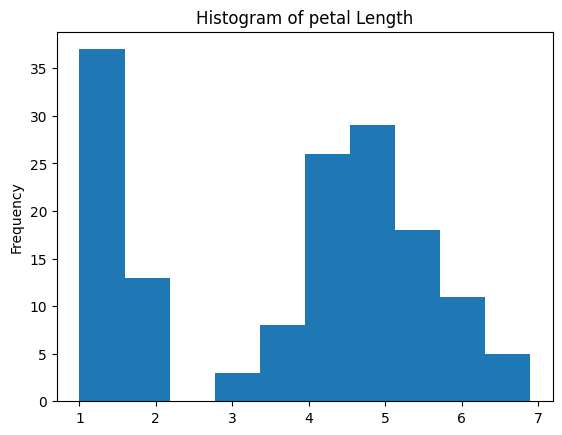

In [26]:
#plot histogram

df['petal_length'].plot.hist(title='Histogram of petal Length')
plt.show()

<ipython-input-49-27d823c1454d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

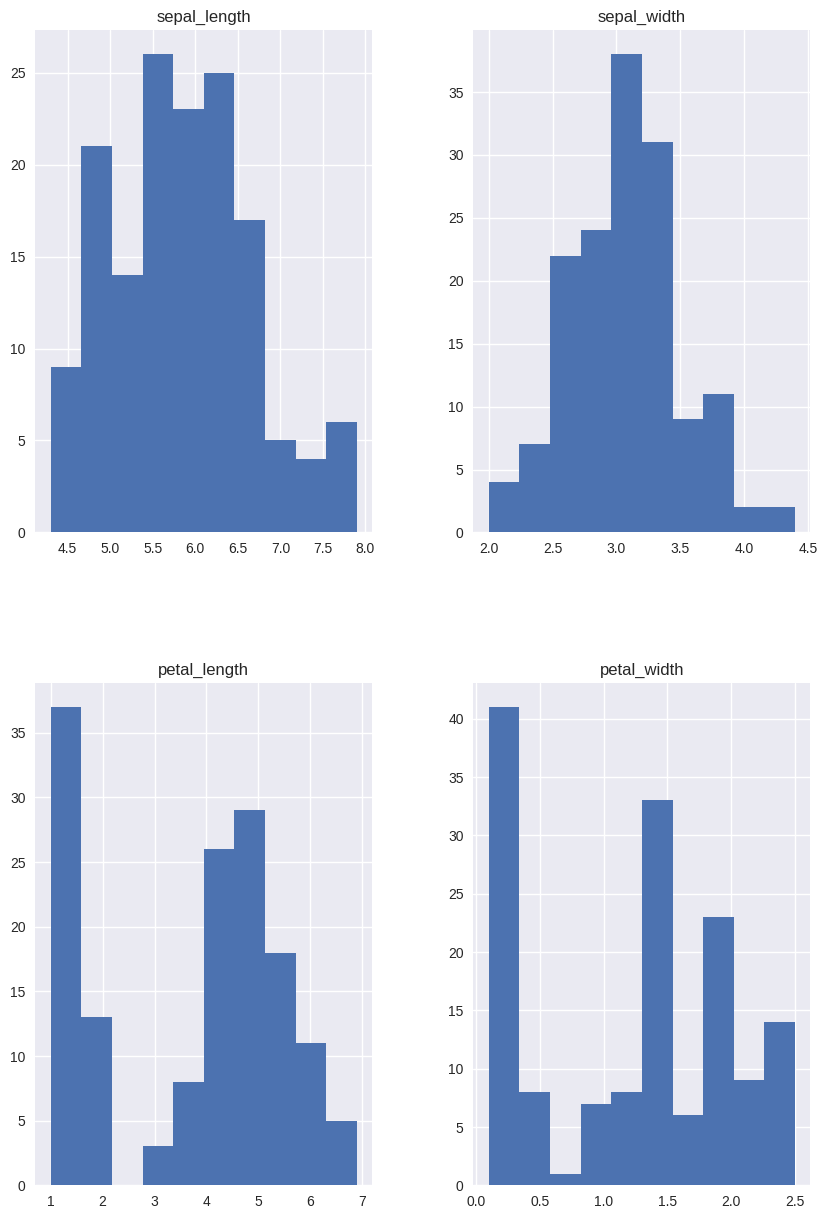

In [49]:
plt.style.use('seaborn')
df.hist(figsize=(10,15))

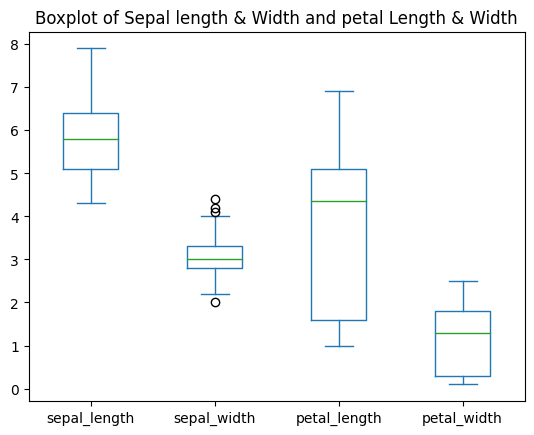

In [27]:
#plot boxplot

df.plot.box(title='Boxplot of Sepal length & Width and petal Length & Width')
plt.show()

'''
Data Preprocessing in Pandas
'''

In [28]:
#Encode categorical variables
df2 = pd.DataFrame({'Day': ['Monday','Tuesday,' 'Wednesday', 'Thursday', ' Friday', 'Saturday', 'Sunday']})

In [29]:
#One-hot-encode

print(pd.get_dummies(df2))
print('')

   Day_ Friday  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0            0           1             0           0             0   
1            0           0             0           0             0   
2            0           0             0           0             1   
3            1           0             0           0             0   
4            0           0             1           0             0   
5            0           0             0           1             0   

   Day_Tuesday,Wednesday  
0                      0  
1                      1  
2                      0  
3                      0  
4                      0  
5                      0  



In [30]:
#imputing missing values
#Import the iris data once again

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])


In [33]:
#Randomly select 10 rows
random_index = np.random.choice(df.index, replace= False, size=10)

In [34]:
#set the sepal_length values of these rows to be None

df.loc[random_index,'sepal_length'] = None

In [35]:
#check where the missing values are

print(df.isnull().any())
print('')

sepal_length     True
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool



In [36]:
#Drop missing values
print("Number of rows before deleting: %d" % (df.shape[0]))
df2 = df.dropna()
print("Number of rows after deleting: %d" % (df.shape[0]))
print('')

Number of rows before deleting: 150
Number of rows after deleting: 150



In [37]:
#Replace missing values with the mean

df.sepal_length = df.sepal_length.fillna(df.sepal_length.mean())

In [40]:
#Confirm that there are no missing values left
print(df.isnull().any())
print('')

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool



In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
np.random.seed(9)


In [44]:
model = Sequential()

In [45]:
#Layer 1
model.add(Dense(units=4, activation='sigmoid', input_dim=3))

#Output Layer
model.add(Dense(units=1, activation='sigmoid'))
print(model.summary())
print('')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None



In [46]:
sgd = optimizers.SGD(lr=1)
model.compile(loss='mean_squared_error', optimizer=sgd)



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [48]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]
             ])
y = np.array([[0],[1],[1],[0]])

model.fit(X, y, epochs=1500, verbose=False)
print(model.predict(X))

1/1 [==============================] - 0s 133ms/step
[[0.04271523]
 [0.9386425 ]
 [0.9488106 ]
 [0.06144049]]
